no need of feature scaling in dtr and rfr

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
dataset=pd.read_csv("Position_Salaries.csv")
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1:].values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [3]:
print(X)
print(X.shape)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
(10, 1)


In [4]:
print(y)
print(y.shape)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]
(10, 1)


In [5]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [6]:
y_pred=regressor.predict(X)
y_pred

array([  45000.,   50000.,   60000.,   80000.,  110000.,  150000.,
        200000.,  300000.,  500000., 1000000.])

In [7]:
from sklearn.metrics import r2_score
acc=r2_score(y,y_pred)
acc*100

100.0

In [8]:
regressor.predict([[6.5]])

array([150000.])

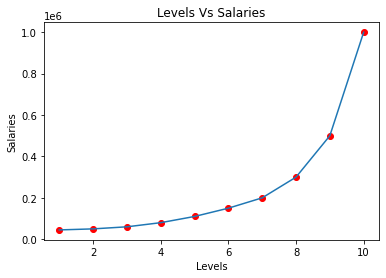

In [9]:
plt.scatter(X,y,color='red')
plt.plot(X,y_pred)
plt.title('Levels Vs Salaries')
plt.xlabel('Levels')
plt.ylabel('Salaries')
plt.show()

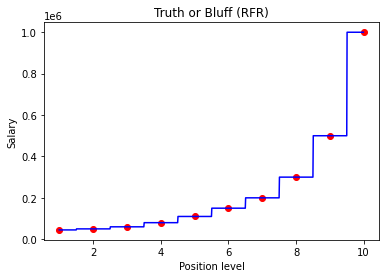

In [10]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict((X_grid)), color = 'blue')
plt.title('Truth or Bluff (RFR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [11]:
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',feature_names =['Levels'])
